# Introduction to evolutionary simulations with Geonomics (Part 1)

The goal of this notebook is to get you to think critically about how evolution happens across space. This notebook will also introduce you to the usefulness of modeling and simulations for understanding evolutionary scenarios. We are using a Python package call **"Geonomics"** that was conceived and created by Dr. Drew Terasaki Hart a former graduate student at UC Berkeley in Ian Wang's lab in the College of Natural Resources, Environmental Science, Policy and Management Department.

* **Geographic variation**: As you've learned in lecture, there is often a geographic component to genetic divergence. Both genetic drift (founder effects in particular) and natural selection are facilitated by geographic isolation, while  gene flow tends to be impeded by it (although this is not always the case). It makes sense to simulate evolution in a programmatic way that allows for explicit and different spatial landscape scenarios, just like in real life.

*Geonomics* allows the user to test hypotheses and run simulations about how the spatial arrangement and size of populations of organisms while incorporating any realistic or modeled geospatial **layers** of a landscape. The so-called forces of evolution can all be simulated: mutation, natural selection, founder effects, genetic drift, and gene-flow. The result is a very flexible platform to allow prediction of evolutionary outcomes during population divergence leading to speciation.

# Glossary

**A glossary of key terms and concepts is available here [Geonomics Glossary Google Doc](https://docs.google.com/document/d/133njF4NFe2SH5zSASTnObL5wGRp3RalnkFM6Aih-Wf0/edit?usp=sharing)




## Important notes: 

*Please don't be overwhelmed by the length of the code blocks in this notebook.* We intentionally left the code for you to see -- and exercises for you to modify the code -- so that you can think about the different parameters than need to be defined to construct a somewhat realistic evolutionary simulation.

You need to read the **text cells** carefully and follow the instructions. Some **code cells** you will *run without changing*. Other times you will need to *edit the cells as instructed* to adjust the parameters of the model so we can simulate different scenarios. Reading the green `# comments` in Geonomics code will help to understand what you are actually doing during model set-up,  running of the model, and model results evaluation, and for **creating your own scenario** at the end. It is not necessary for you to read all of the `# comments` or code during this Notebook, this is what a user of the Geonomics package will refer to while running their simulations. We will also make use of **functions** which are blocks of code that start with `def` which perform a task (you do not need to edit or make your own functions); for example, we might use a function to plot a map or create a landscape.

## Helpful Reminders: 

### Jupyter notebooks
When a cell is running the circle in the top right of the notebook next to Python 3 will be solid grey. Some cells take several seconds to run. Just be patient.


### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top to confirm any changes. (Try not to delete the instructions of the lab.)

**The only text cells that need to be modified are labeled "YOUR RESPONSE HERE" and are right below yellow question boxes. To edit a response, double click on YOUR RESPONSE HERE and type in your answer. Afterwards, run the cell with Shift-Enter.**

### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press the Run button or hold down the `shift` key and press `return` or `enter`.

The only code cells that need to be modified are right below a blue exercise box.

### Comments
Comments are statements in English that the computer ignores. We use comments to explain what the surrounding code does. Comments appear in green after the `#` symbol.

<div class="alert alert-info" role="alert" style="font-size:120%">
    
**Agenda**:
<ul>
    <li>1. short intro about Geonomics package</li>
    <li>2. see briefly how Geonomics works (create parameters file, edit, make model, run model, visualize)</li>
    <li>3. run a two-stage simulation of neutral evolution</li>
</ul>

<p>

</p>
</div>

<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>What does Geonomics do?</h2></b> 

Geonomics is a Python package that simulates the genetic evolution of species distributed across landscapes. The landscapes can be arbitrarily complex, and can undergo environmental change over time. Species are composed of individuals, each of which has its own genome. The genes in those genomes can be used to determine the phenotypes of individuals, which can then undergo differential survival because of how poorly or well they are adapted to their local environments - that is, natural selection.

The model operates by iterating through time steps (which you can think of being similar to generations). Each time step, a series of basic biological operations are carried out for all individuals. Over time, patterns of genetic diversity can build up on the landscape. These are what we are interested in studying, because these patterns in real-world species can help us make inferences about important things that have happened or are happening in nature, such as migration, adaptation, extinction, and the like.  In the real world, observing these kinds of changes could take thousands of years (depending on the organism), so models help us see these patterns in a much shorter time frame!

Below are a conceptual diagram and its caption, taken from [the Geonomics homepage](https://github.com/drewhart/geonomics). They give a simple explanation of how each time step works.

![conceptual_diagram](https://github.com/erthward/geonomics/raw/main/img/conceptual_diagram.jpg)

In the center is a species on a multi-layer landscape that includes a selection layer (above) and a movement and carrying capacity layer (below). Surrounding the landscape is a flow-diagram of the major operations during a time step.

- **movement**: During the movement stages (top-left), individuals move along movement vectors drawn from various distribution options.
- **mating**: During the mating stage (top-right), an individual (purple outline) randomly chooses a mate (green outline) from all potential mates within its mating radius (dashed circle). The resulting offspring (dashed outline) disperses from its parents' midpoint along a randomly drawn dispersal vector.
- **mortality**: During the mortality stage (bottom-right), deaths are modeled as a Bernoulli process, with the probability of mortality being a product of density-dependence and selection on all traits.
- **changes**: During this stage (bottom-left), demographic change events (not pictured) and environmental change events (represented as a series of change rasters corresponding to scheduled time steps, t1, t2, …, tn), take place.

Let's think about this in terms of the real world.  Think of the landscape in Geonomics as an island that we can control.  The different layers represent different environmental conditions on that island, like elevation, temperature, rainfall, food availability, etc.  Right now, there is one species on our island, and each time step represents one generation of individuals.  We will use mice (like rock pocket mice) for our example.

During each time step, our mice will do three different things: move around (movement), find mates and produce offspring (mating), and die (mortality). The Geonomics model allows us to dictate how our mice do each of these things- for example, we can say that a mouse can only move within 15 meters of where it was born and can only find a mate within one meter of its location.  We can also specify how long each mouse lives, and if certain environmental conditions (like high temperature) will increase their likelihood of death or survival.

While our mice are doing their thing, our landscape model will also change based on any predetermined parameters (changes).  Before running the model, we can set up landscape events to occur at certain time steps.  For example, we can say that for every 10 time steps, the temperature will increase by one degree Celsius.  Since we can link environmental factors to mortality, this will let us model how increasing temperature will affect our mice population over hundreds of generations!

### Okay! Now on to the code!

<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Import needed packages</h2></b> 

Run the following cell to tweak the default software versions installed on DataHub

In [122]:
!conda config --add channels conda-forge
!conda install msprime -y
!conda install geopandas -y
!conda install rasterio -y
!conda install bitarray -y
!pip install NLMpy -q
!pip install geonomics -q

Channels:
 - conda-forge
 - conda-forge/label/gcc7
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



Run the following cell to bring in the necessary Python packages for our exercise today. Recall that you need to run this cell and any cells above the one you are working on each time you relaunch the notebook.

In [1]:
import geonomics as gnx
import numpy as np
import matplotlib.pyplot as plt

# and also set Matplotlib's default plotting style and plot size
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,4)

NOTE: Module 'pykrige' not found. Yosemite demo 3d plots cannot be produced.


<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Define some helper functions</h2></b> 

Here we will define some functions to create simple, geometric arrays, which we'll use as landscapes for our simulations.

__No need to alter the code here.__ Just run it. We'll use the functions below.

In [5]:
################################
# RUN THIS CODE WITHOUT CHANGING
################################

def make_unif_array(n):
    """Makes a square array of ones, size n x n cells."""
    array = np.ones((n,n))
    return array

In [7]:
################################
# RUN THIS CODE WITHOUT CHANGING
################################

def add_vert_barrier(array, width = 5):
    """Returns a new array, which is the input array but with an added vertical barrier of the defined width."""
    if array.shape[0] % 2 != width % 2:
        width += 1
    assert width <= array.shape[0] - 2, ("The width of the barrier should be "
                                       "at least 2 less than the width of the landscape.")
    left_extent = int((array.shape[0] - width)/2)
    right_extent = left_extent + width
    new_array = np.copy(array)
    new_array[:, left_extent:right_extent] = 0
    return new_array

In [9]:
################################
# RUN THIS CODE WITHOUT CHANGING
################################

def make_horz_grad_array(n, grad_width=8):
    """Makes a square array with a horizontal gradient
    running from 0 to 1, size n x n cells."""
    assert grad_width <= n, "Argument 'grad_width' must be <= argument 'n'."
    if n % 2 != grad_width % 2:
        grad_width += 1
    grad_vals = np.linspace(0, 1, grad_width)
    append_len = int((n - grad_width) / 2)
    grad_vals = np.hstack([np.zeros((append_len)), grad_vals, np.ones((append_len))])
    array = np.vstack([grad_vals.T]*n)
    return array

We'll also load some functions that will use the multivariate statistical method called Principal Component Analysis (PCA) to assign genetic-relatedness values to all the individuals in a species. 

The first function will plot all individuals in "genetic relatedness space", such that distances between individuals represent how genetically different they are. 

The second function will map individuals on the landscape, colored by their genetic relatedness, such that more similar-colored individuals are more related.

We can use these visualizations to get a sense for how the genetic relatedness of the individuals in our species changes over time, because of distance, landscape features, population size and density, selective pressure, and other influences.

__No need to alter the code here.__ Just run it.

In [12]:
################################
# RUN THIS CODE WITHOUT CHANGING
################################

# function for running and plotting genetic PCA
def plot_PCA(mod):
    from copy import deepcopy
    from sklearn.decomposition import PCA
    figsize = 6
    species = mod.comm[0]
    # get array of resulting genomic data (i.e. 'speciome'),
    # genotypes averaged by individual
    speciome = np.mean(species._get_genotypes(), axis=2)
    # run PCA on speciome
    pca = PCA(n_components=2)
    PCs = pca.fit_transform(speciome)
    # normalize the PC results
    norm_PCs = (PCs - np.min(PCs,
                             axis=0)) / (np.max(PCs,
                                                axis=0) - np.min(PCs,
                                                                 axis=0))
    # assign a value to each species, 0 or 1, indicating whether they're located on
    # the left or right vertical half of the landscape
    ind_colors = ['#00ffff' if ind.x < mod.land.dim[0]/2 else '#ff00ff' for ind in species.values()]
    # plot individuals on PCs 1 and 2, colored by their landscape half
    fig = plt.figure(figsize=(figsize, figsize), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(norm_PCs[:,0], norm_PCs[:, 1], color = ind_colors)
    plt.xlabel('genetic PC 1')
    plt.ylabel('genetic PC 2')

In [14]:
################################
# RUN THIS CODE WITHOUT CHANGING
################################

# function for running and plotting genetic PCA
def map_PCA(mod, lyr_num=0, mask=True):
    from copy import deepcopy
    from sklearn.decomposition import PCA
    cmaps = {0: plt.cm.RdBu.copy(), 1: plt.cm.BrBG_r.copy()}
    mark_size = 60
    figsize = 8
    species = mod.comm[0]
    land = mod.land
    # get array of resulting genomic data (i.e. 'speciome'),
    # genotypes meaned by individual
    speciome = np.mean(species._get_genotypes(), axis=2)
    # run PCA on speciome
    pca = PCA(n_components=3)
    PCs = pca.fit_transform(speciome)
    # normalize the PC results
    norm_PCs = (PCs - np.min(PCs,
                             axis=0)) / (np.max(PCs,
                                                axis=0) - np.min(PCs,
                                                                 axis=0))
    # use first 3 PCs to get normalized values for R, G, & B colors
    PC_colors = norm_PCs * 255
    # scatter all individuals on top of landscape, colored by the
    # RBG colors developed from the first 3 geonmic PCs
    xs = mod.comm[0]._get_x()
    ys = mod.comm[0]._get_y()
    # get environmental raster, with barrier masked out
    env = deepcopy(mod.land[lyr_num].rast)
    if mask:
        env[mod.land[lyr_num].rast == 0] = np.nan
    # create light colormap for plotting landscape
    # bot = plt.cm.get_cmap('Blues', 256)(np.linspace(0.4, 0.45, 2))[0]
    # top = plt.cm.get_cmap('Reds', 256)(np.linspace(0.4, 0.45, 2))[0]
    # cols = np.vstack((top, bot))
    # cmap = mpl.colors.ListedColormap(cols, name='OrangeBlue')
    cmap = cmaps[lyr_num]
    cmap.set_bad(color='#8C8C8C')
    # plot landscape
    fig = plt.figure(figsize=(figsize, figsize), dpi= 80, facecolor='w', edgecolor='k')
    # plt.imshow(masked_env, cmap=cmap, alpha=0.8)
    plt.pcolormesh(land._x_cell_bds, land._y_cell_bds, env, cmap=cmap)
    # scatter plot of individuals, colored by composite PC score
    plt.scatter(xs, ys, c=PC_colors/255.0, s=mark_size, edgecolors='black')
    # fix x and y limits
    [f([dim - 0.5 for dim in (0, mod.land.dim[0])]) for f in (plt.xlim,
                                                              plt.ylim)]
    # get rid of x and y ticks
    [f([]) for f in (plt.xticks, plt.yticks)]



<div class="alert alert-danger" role="alert" style="font-size:120%">
    <b><h2>PART 1: Neutral evolution</h2></b> 

The following section will walk through a neutral evolutionary simulation on a very simple landscape.

This simulation will highlight the effects of geographic and cost distance on genetic relatedness.


<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Set the parameter values </h2></b> 

The following long block of code creates a Geonomics parameters object.

That object in turn will be used to instantiate (i.e. make a new, independent example of) a Geonomics model, which we can use to run simulations.

The model will be composed of:

- **a landscape**, with one **layer** that we'll use as both the environment and the carrying-capacity map (i.e. our island)
- **a species**, which moves around on the landscape and has genomes containing only neutral loci (i.e. our mice).

In [20]:
# neutral_demo.py

# This is a parameters file generated by Geonomics
# (by the gnx.make_parameters_file() function).


                   #   ::::::          :::    :: :::::::::::#
             #::::::    ::::   :::      ::    :: :: ::::::::::: ::#
          #:::::::::     ::            ::   :::::::::::::::::::::::::#
        #::::::::::                      :::::::::: :::::: ::::::::  ::#
      #  : ::::  ::                    ::::  : ::    :::::::: : ::  :    #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
    # GG     EE    OO   OO  NNN  NN  OO   OO  MM   MM   II   CC     SS     #
    # GG     EE   OO     OO NN N NN OO     OO MMM MMM   II   CC     SSSSSS #
    # GG GGG EEEE OO     OO NN  NNN OO     OO MM M MM   II   CC         SS #
    # GG   G EE    OO   OO  NN   NN  OO   OO  MM   MM   II   CC        SSS #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
      #    : ::::::::               :::::::::: ::              ::  :   : #
        #:    :::::                    :::::: :::             :::::::  #
          #    :::                      :::::  ::              ::::: #
             #  ::                      ::::                      #
                   #                                        #
                      #  :: ::    :::             #


params = {
###############################################################################

###################
#### LANDSCAPE ####
###################
    'landscape': {

    ##############
    #### main ####
    ##############
        'main': {
            #x,y (a.k.a. j,i) dimensions of the Landscape
            'dim':                      (20,20),
            #x,y resolution of the Landscape
            'res':                      (1,1),
            #x,y coords of upper-left corner of the Landscape
            'ulc':                      (0,0),
            #projection of the Landscape
            'prj':                      None,
            }, # <END> 'main'

    ################
    #### layers ####
    ################
        'layers': {

            #layer name (LAYER NAMES MUST BE UNIQUE!)
            'lyr_0': {

        #######################################
        #### layer num. 0: init parameters ####
        #######################################

                #initiating parameters for this layer
                'init': {

                    #parameters for a 'defined'-type Layer
                    'defined': {
                        #raster to use for the Layer
                        'rast':                   np.ones((20,20)),
                        #point coordinates
                        'pts':                    None,
                        #point values
                        'vals':                   None,
                        #interpolation method {None, 'linear', 'cubic',
                        #'nearest'}
                        'interp_method':          None,

                        }, # <END> 'defined'

                    }, # <END> 'init'

                }, # <END> layer num. 0



    #### NOTE: Individual Layers' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Layers.


            } # <END> 'layers'

        }, # <END> 'landscape'


###############################################################################

###################
#### COMMUNITY ####
###################
    'comm': {

        'species': {

            #species name (SPECIES NAMES MUST BE UNIQUE!)
            'spp_0': {

            #####################################
            #### spp num. 0: init parameters ####
            #####################################

                'init': {
                    #starting number of individs
                    'N':                250,
                    #carrying-capacity Layer name
                    'K_layer':          'lyr_0',
                    #multiplicative factor for carrying-capacity layer
                    'K_factor':         1,
                    }, # <END> 'init'

            #######################################
            #### spp num. 0: mating parameters ####
            #######################################

                'mating'    : {
                    #age(s) at sexual maturity (if tuple, female first)
                    'repro_age':                0,
                    #whether to assign sexes
                    'sex':                      False,
                    #ratio of males to females
                    'sex_ratio':                1/1,
                    #whether P(birth) should be weighted by parental dist
                    'dist_weighted_birth':       False,
                    #intrinsic growth rate
                    'R':                        0.5,
                    #intrinsic birth rate (MUST BE 0<=b<=1)
                    'b':                        0.2,
                    #expectation of distr of n offspring per mating pair
                    'n_births_distr_lambda':    1,
                    #whether n births should be fixed at n_births_dist_lambda
                    'n_births_fixed':           True,
                    #radius of mate-search area
                    'mating_radius':            10,
                    #whether individs should choose nearest neighs as mates
                    'choose_nearest_mate':        False,
                    #whether mate-choice should be inverse distance-weighted                                                                                                                  
                    'inverse_dist_mating':      False,
                    }, # <END> 'mating'

            ##########################################
            #### spp num. 0: mortality parameters ####
            ##########################################

                'mortality'     : {
                    #maximum age
                    'max_age':                      None,
                    #min P(death) (MUST BE 0<=d_min<=1)
                    'd_min':                        0,
                    #max P(death) (MUST BE 0<=d_max<=1)
                    'd_max':                        1,
                    #width of window used to estimate local pop density
                    'density_grid_window_width':    None,
                    }, # <END> 'mortality'

            #########################################
            #### spp num. 0: movement parameters ####
            #########################################

                'movement': {
                    #whether or not the species is mobile
                    'move':                                 True,
                    #mode of distr of movement direction
                    'direction_distr_mu':                   0,
                    #concentration of distr of movement direction
                    'direction_distr_kappa':                0,
                    #1st param of distr of movement distance
                    'movement_distance_distr_param1':       0.5,
                    #2nd param of distr of movement distance
                    'movement_distance_distr_param2':       5e-8,
                    #movement distance distr to use ('levy' or 'wald')
                    'movement_distance_distr':              'levy',
                    #1st param of distr of dispersal distance
                    'dispersal_distance_distr_param1':      0,
                    #2nd param of distr of dispersal distance
                    'dispersal_distance_distr_param2':      5e-14,
                    #dispersal distance distr to use ('levy' or 'wald')
                    'dispersal_distance_distr':             'levy',
                    'move_surf'     : {
                        #move-surf Layer name
                        'layer':                'lyr_0',
                        #whether to use mixture distrs
                        'mixture':              True,
                        #concentration of distrs
                        'vm_distr_kappa':       12,
                        #length of approximation vectors for distrs
                        'approx_len':           5000,
                        }, # <END> 'move_surf'

                    },    # <END> 'movement'


            #####################################################
            #### spp num. 0: genomic architecture parameters ####
            #####################################################

                'gen_arch': {
                    #file defining custom genomic arch
                    'gen_arch_file':            None,
                    #num of loci
                    'L':                        100,
                    #starting allele frequency (None to draw freqs randomly)
                    'start_p_fixed':            0.5,
                    #whether to start neutral locus freqs at 0
                    'start_neut_zero':          False,
                    #genome-wide per-base neutral mut rate (0 to disable)
                    'mu_neut':                  0,
                    #genome-wide per-base deleterious mut rate (0 to disable)
                    'mu_delet':                 0,
                    #shape of distr of deleterious effect sizes
                    'delet_alpha_distr_shape':  0.2,
                    #scale of distr of deleterious effect sizes
                    'delet_alpha_distr_scale':  0.2,
                    #alpha of distr of recomb rates
                    'r_distr_alpha':            None,
                    #beta of distr of recomb rates
                    'r_distr_beta':             None,
                    #whether loci should be dominant (for allele '1')
                    'dom':                      False,
                    #whether to allow pleiotropy
                    'pleiotropy':               False,
                    #custom fn for drawing recomb rates
                    'recomb_rate_custom_fn':    None,
                    #number of recomb paths to hold in memory
                    'n_recomb_paths_mem':       int(1e4),
                    #total number of recomb paths to simulate
                    'n_recomb_paths_tot':       int(1e5),
                    #num of crossing-over events (i.e. recombs) to simulate
                    'n_recomb_sims':            10_000,
                    #whether to jitter recomb bps, to correctly track num_trees
                    'jitter_breakpoints':       False,
                    #whether to generate recombination paths at each timestep
                    'allow_ad_hoc_recomb':      False,
                    #whether to use tskit (to record full spatial pedigree)
                    'use_tskit':                True,
                    #time step interval for simplication of tskit tables
                    'tskit_simp_interval':      100,
                    #whether to save mutation logs
                    'mut_log':                  False,

                    }, # <END> 'gen_arch'


                }, # <END> spp num. 0



    #### NOTE: individual Species' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Species.


            }, # <END> 'species'

        }, # <END> 'comm'


###############################################################################

###############
#### MODEL ####
###############
    'model': {
        #total Model runtime (in timesteps)
        'T':            100,
        #min burn-in runtime (in timesteps)
        'burn_T':       30,
        #seed number
        'num':          None,                                      

        ###############################
        #### iterations parameters ####
        ###############################
        'its': {
            #num iterations
            'n_its':            1,
            #whether to randomize Landscape each iteration
            'rand_landscape':   False,
            #whether to randomize Community each iteration
            'rand_comm':        False,
            #whether to burn in each iteration
            'repeat_burn':      False,
            #whether to randomize GenomicArchitectures each iteration
            'rand_genarch':     True,              
            }, # <END> 'iterations'



        } # <END> 'model'

    } # <END> params


<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Create a model from those parameters</h2></b> 

In [23]:
#make our params dict into a proper Geonomics ParamsDict object
params = gnx.make_params_dict(params, 'neutral_demo')
#then use it to make a model
mod = gnx.make_model(parameters=params, verbose=True)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...

			making individuals...

			making movement surface...
				[can take a bit]



In [24]:
#take a look at the resulting object
mod

<class 'geonomics.sim.model.Model'>
Model name:                                     neutral_demo
Layers:                                         0: 'lyr_0'
Species:                                        0: 'spp_0'
Number of iterations:                           1
Number of burn-in timesteps (minimum):          30
Number of main timesteps:                       100
Geo-data collected:                             {}
Gen-data collected:                             {}
Stats collected:                                {}

Now we'll plot the model, to see how many individuals we have, and where on the landscape they're located.

------------------------


### NOTE:
**This and all following figures will be interactive! You can use the buttons to the bottom left of the figure to zoom and move the figure as desired. The 'home' button will return the figure to its default view. This may later prove helpful when you are inspecting your figures and thinking about the associated questions!**

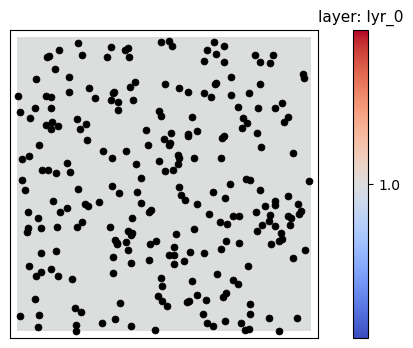

In [26]:
#plot the resulting object
#spp = species, in this case we just have one species (species 0)
#lyr = landscape layer, in this case we only have one layer (layer 0)
mod.plot(spp=0, lyr=0)

### **Concept check**: *What are the black dots on the gray background?*

<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Run the model</h2></b> 

Geonomics allows us to use our model in either of two ways:

- **'run'**: Run the model to completion (i.e. for the number of iterations and the number of timesteps per iteration that are stipulated in the model's parameters). This is more convenient for leaving a model running and generating data.

- **'walk'**: Run the model for any number of timesteps, then stop it. This is more convenient for running a model interactively and inspecting it. This is what we'll use.


In [32]:
#First we have to run the model burn-in

#T=10000 allows the model run up to 10000 steps, but it will burn in much faster than that.

#After it runs, scroll to the bottom to see how the time steps progressed.

mod.walk(T=10000, mode='burn')




No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=269	(births=67	deaths=48)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=281	(births=63	deaths=51)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=276	(births=55	deaths=60)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=287	(births=60	deaths=49)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=303	(births=51	deaths=35)

	........................................................................
burn:	it=-1:	t=5
	species: spp_0                         N=288

### **Concept check** *How many individuals did you start and end with? How many births and deaths were there at the beginning / and births and deaths during the last time step?*

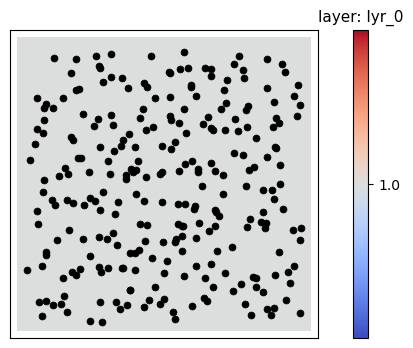

In [35]:
#Now we can plot it again to see the burned-in stable state.
# note, mod.plot(0, 0) is the same as mod.plot(spp=0, lyr=0)
mod.plot(0, 0)




main:	it=-1:	t=0
	species: spp_0                         N=265	(births=49	deaths=48)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=264	(births=49	deaths=50)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=264	(births=57	deaths=57)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=279	(births=52	deaths=37)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=271	(births=38	deaths=46)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=283	(births=54	deaths=42)

	........................................................................
main:	it=-1:	t=6
	species: spp_0      

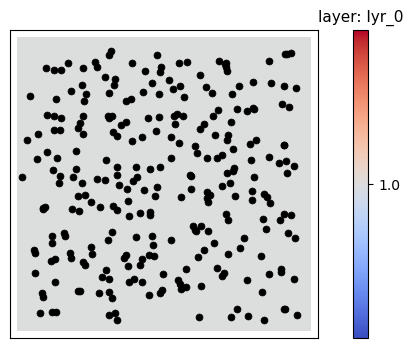

In [36]:
#Now we can run the main phase of the model for any desired number of timesteps, then plot it again.
mod.walk(10, 'main')
mod.plot(0, 0)

### **Concept check** *As you run the main phase of the model, and plot the result, what is changing?*

<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>Make the landscape heterogeneous</h2></b> 

**What if we make the same model, but use a more interesting landscape?**

Here we'll repeat the same process, but make our landscape using a **neutral landscape model (NLM)** algorithm.  We do this by changing some of the parameters in the 'lyr_0' section; you can compare that to the parameters code above. The NLM will produce a spatially autocorrelated pattern - i.e. one in which the landscape variable varies across space, but in a way that nearby values are more similar than distant values.  For example, if our variable is ground color, areas close to one another will be closer in color (i.e. dark spaces will border other dark spaces).

Landscape ecologists often use NLMs as null models against which real-world patterns can be compared, to draw inferences about what might have generated real-world patterns. NLMs do not represent actual landscapes, but serve as the standard against which actual landscapes may be compared. This is referred to as a **null model**.

*Here we won't use the NLM as a null model for hypothesis testing. Instead, we'll just use it as a quick way to get a more interesting landscape with a realistic pattern.*

In [49]:
# neutral_demo_NLM.py

# This is a parameters file generated by Geonomics
# (by the gnx.make_parameters_file() function).


                   #   ::::::          :::    :: :::::::::::#
             #::::::    ::::   :::      ::    :: :: ::::::::::: ::#
          #:::::::::     ::            ::   :::::::::::::::::::::::::#
        #::::::::::                      :::::::::: :::::: ::::::::  ::#
      #  : ::::  ::                    ::::  : ::    :::::::: : ::  :    #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
    # GG     EE    OO   OO  NNN  NN  OO   OO  MM   MM   II   CC     SS     #
    # GG     EE   OO     OO NN N NN OO     OO MMM MMM   II   CC     SSSSSS #
    # GG GGG EEEE OO     OO NN  NNN OO     OO MM M MM   II   CC         SS #
    # GG   G EE    OO   OO  NN   NN  OO   OO  MM   MM   II   CC        SSS #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
      #    : ::::::::               :::::::::: ::              ::  :   : #
        #:    :::::                    :::::: :::             :::::::  #
          #    :::                      :::::  ::              ::::: #
             #  ::                      ::::                      #
                   #                                        #
                      #  :: ::    :::             #


params = {
###############################################################################

###################
#### LANDSCAPE ####
###################
    'landscape': {

    ##############
    #### main ####
    ##############
        'main': {
            #x,y (a.k.a. j,i) dimensions of the Landscape
            'dim':                      (20,20),
            #x,y resolution of the Landscape
            'res':                      (1,1),
            #x,y coords of upper-left corner of the Landscape
            'ulc':                      (0,0),
            #projection of the Landscape
            'prj':                      None,
            }, # <END> 'main'

    ################
    #### layers ####
    ################
        'layers': {

            #layer name (LAYER NAMES MUST BE UNIQUE!)
            'lyr_0': {

        #######################################
        #### layer num. 0: init parameters ####
        #######################################

                #initiating parameters for this layer
                'init': {
                    
                    #parameters for an 'nlmpy'-type Layer
                    'nlmpy': {
                        #nlmpy function to use the create this Layer
                        'function':                 'mpd',
                        #number of rows (MUST EQUAL LANDSCAPE DIMENSION y!)
                        'nRow':                     20,
                        #number of cols (MUST EQUAL LANDSCAPE DIMENSION x!)
                        'nCol':                     20,
                        #level of spatial autocorrelation in element values
                        'h':                        1,

                        }, # <END> 'nlmpy'

                    }, # <END> 'init'

                }, # <END> layer num. 0



    #### NOTE: Individual Layers' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Layers.


            } # <END> 'layers'

        }, # <END> 'landscape'


###############################################################################

###################
#### COMMUNITY ####
###################
    'comm': {

        'species': {

            #species name (SPECIES NAMES MUST BE UNIQUE!)
            'spp_0': {

            #####################################
            #### spp num. 0: init parameters ####
            #####################################

                'init': {
                    #starting number of individs
                    'N':                250,
                    #carrying-capacity Layer name
                    'K_layer':          'lyr_0',
                    #multiplicative factor for carrying-capacity layer
                    'K_factor':         1,
                    }, # <END> 'init'

            #######################################
            #### spp num. 0: mating parameters ####
            #######################################

                'mating'    : {
                    #age(s) at sexual maturity (if tuple, female first)
                    'repro_age':                0,
                    #whether to assign sexes
                    'sex':                      False,
                    #ratio of males to females
                    'sex_ratio':                1/1,
                    #whether P(birth) should be weighted by parental dist
                    'dist_weighted_birth':       False,
                    #intrinsic growth rate
                    'R':                        0.5,
                    #intrinsic birth rate (MUST BE 0<=b<=1)
                    'b':                        0.2,
                    #expectation of distr of n offspring per mating pair
                    'n_births_distr_lambda':    1,
                    #whether n births should be fixed at n_births_dist_lambda
                    'n_births_fixed':           True,
                    #radius of mate-search area
                    'mating_radius':            10,
                    #whether individs should choose nearest neighs as mates
                    'choose_nearest_mate':        False,
                    #whether mate-choice should be inverse distance-weighted                                                                                                                  
                    'inverse_dist_mating':      False,
                    }, # <END> 'mating'

            ##########################################
            #### spp num. 0: mortality parameters ####
            ##########################################

                'mortality'     : {
                    #maximum age
                    'max_age':                      None,
                    #min P(death) (MUST BE 0<=d_min<=1)
                    'd_min':                        0,
                    #max P(death) (MUST BE 0<=d_max<=1)
                    'd_max':                        1,
                    #width of window used to estimate local pop density
                    'density_grid_window_width':    None,
                    }, # <END> 'mortality'

            #########################################
            #### spp num. 0: movement parameters ####
            #########################################

                'movement': {
                    #whether or not the species is mobile
                    'move':                                 True,
                    #mode of distr of movement direction
                    'direction_distr_mu':                   0,
                    #concentration of distr of movement direction
                    'direction_distr_kappa':                0,
                    #1st param of distr of movement distance
                    'movement_distance_distr_param1':       0.5,
                    #2nd param of distr of movement distance
                    'movement_distance_distr_param2':       5e-8,
                    #movement distance distr to use ('levy' or 'wald')
                    'movement_distance_distr':              'levy',
                    #1st param of distr of dispersal distance
                    'dispersal_distance_distr_param1':      0,
                    #2nd param of distr of dispersal distance
                    'dispersal_distance_distr_param2':      5e-14,
                    #dispersal distance distr to use ('levy' or 'wald')
                    'dispersal_distance_distr':             'levy',
                    'move_surf'     : {
                        #move-surf Layer name
                        'layer':                'lyr_0',
                        #whether to use mixture distrs
                        'mixture':              True,
                        #concentration of distrs
                        'vm_distr_kappa':       12,
                        #length of approximation vectors for distrs
                        'approx_len':           5000,
                        }, # <END> 'move_surf'

                    },    # <END> 'movement'


            #####################################################
            #### spp num. 0: genomic architecture parameters ####
            #####################################################

                'gen_arch': {
                    #file defining custom genomic arch
                    'gen_arch_file':            None,
                    #num of loci
                    'L':                        100,
                    #starting allele frequency (None to draw freqs randomly)
                    'start_p_fixed':            0.5,
                    #whether to start neutral locus freqs at 0
                    'start_neut_zero':          False,
                    #genome-wide per-base neutral mut rate (0 to disable)
                    'mu_neut':                  0,
                    #genome-wide per-base deleterious mut rate (0 to disable)
                    'mu_delet':                 0,
                    #shape of distr of deleterious effect sizes
                    'delet_alpha_distr_shape':  0.2,
                    #scale of distr of deleterious effect sizes
                    'delet_alpha_distr_scale':  0.2,
                    #alpha of distr of recomb rates
                    'r_distr_alpha':            None,
                    #beta of distr of recomb rates
                    'r_distr_beta':             None,
                    #whether loci should be dominant (for allele '1')
                    'dom':                      False,
                    #whether to allow pleiotropy
                    'pleiotropy':               False,
                    #custom fn for drawing recomb rates
                    'recomb_rate_custom_fn':    None,
                    #number of recomb paths to hold in memory
                    'n_recomb_paths_mem':       int(1e4),
                    #total number of recomb paths to simulate
                    'n_recomb_paths_tot':       int(1e5),
                    #num of crossing-over events (i.e. recombs) to simulate
                    'n_recomb_sims':            10_000,
                    #whether to generate recombination paths at each timestep
                    'allow_ad_hoc_recomb':      False,
                    #whether to save mutation logs
                    'mut_log':                  False,
                    #whether to jitter recomb bps, to correctly track num_trees
                    'jitter_breakpoints':       False,
                    #whether to use tskit (to record full spatial pedigree)
                    'use_tskit':                True,
                    #time step interval for simplication of tskit tables
                    'tskit_simp_interval':      100,

                    }, # <END> 'gen_arch'


                }, # <END> spp num. 0



    #### NOTE: individual Species' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Species.


            }, # <END> 'species'

        }, # <END> 'comm'


###############################################################################

###############
#### MODEL ####
###############
    'model': {
        #total Model runtime (in timesteps)
        'T':            100,
        #min burn-in runtime (in timesteps)
        'burn_T':       30,
        #seed number
        'num':          None,


        ###############################
        #### iterations parameters ####
        ###############################
        'its': {
            #num iterations
            'n_its':            1,
            #whether to randomize Landscape each iteration
            'rand_landscape':   False,
            #whether to randomize Community each iteration
            'rand_comm':        False,
            #whether to burn in each iteration
            'repeat_burn':      False,
            #whether to randomize GenomicArchitectures each iteration
            'rand_genarch':     True, 
            }, # <END> 'iterations'



        } # <END> 'model'

    } # <END> params


Now we'll do the same steps as before:
- make the model
- run it
- plot the results

To do that, go ahead and **run the next few cells**.

In [75]:
params = gnx.make_params_dict(params, 'heterogeneous_demo')
mod = gnx.make_model(parameters=params, verbose=True)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...

			making individuals...

			making movement surface...
				[can take a bit]



In [77]:
mod.walk(T=10000, mode='burn')



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=62	(births=45	deaths=233)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=58	(births=13	deaths=17)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=59	(births=15	deaths=14)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=53	(births=9	deaths=15)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=58	(births=15	deaths=10)

	........................................................................
burn:	it=-1:	t=5
	species: spp_0                         N=53	(birt

In [78]:
mod.walk(T=10, mode='main')



main:	it=-1:	t=0
	species: spp_0                         N=40	(births=7	deaths=4)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=42	(births=7	deaths=5)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=46	(births=9	deaths=5)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=44	(births=10	deaths=12)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=47	(births=8	deaths=5)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=44	(births=10	deaths=13)

	........................................................................
main:	it=-1:	t=6
	species: spp_0                    

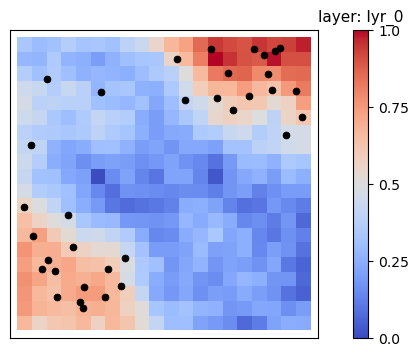

In [81]:
mod.plot(lyr=0, spp=0)

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-warning">
    <b>QUESTION 1: Briefly explain how Geonomics works and compare the models we built and ran (one without spatial heterogeneity and one with spatial heterogeneity using the NLM as our layer).</b>
    <br />    
</div>


Q1: YOUR RESPONSE HERE

<!-- END QUESTION -->

  **Hint**: Recall that in the second model we used an NLM as the habitat map and the carrying-capacity map.

<div class="alert alert-danger" role="alert" style="font-size:120%">
    <b><h2>PART 2: Environmental Change</h2></b> 

Now that we've seen a quick example of how Geonomics works, we'll make a more complicated model, then use the results to explore questions about gene flow, isolation, founder effects, and genetic divergence in species distributed across space.

For example, **what would happen if a barrier were to arise on the landscape?** n the real world, this could happen in a number of ways.  For our mouse island, one example could be the construction of a highway.

Let's simulate one to find out!

This time, for the first 500 time steps, our species will evolve on a homogeneous landscape (just like our first model). We will make some plots to observe the model, we'll create another model with a homogeneous landscape layer, then run that model for 500 timesteps and observe how genetic relatedness changes over time.  *This will be equivalent to watching genetic evolution in the first model we made.* 

But then, a big central barrier will arise. We will see this barrier arise right after it arises, simulate another 500 time steps, then use the same plots to see how the barrier influenced genetic relatedness.


### **Concept check** *What do you expect to see after the appearance of the barrier?  For example, do you think individuals on opposite sides of the barrier will stay closely related after 500 generations?*

To start off, we need to create and save an array for our landscape layer. To do that, we'll use one of the helper functions that we loaded at the beginning. To do that, **run the next cell**.

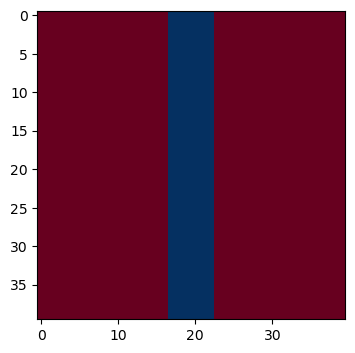

In [83]:
#save a new file
barr_lyr = add_vert_barrier(make_unif_array(40))
plt.imshow(barr_lyr, cmap = 'RdBu_r')
np.savetxt('barrier.txt', barr_lyr, fmt='%0.5f')

Now we'll create a new model, using extra parameters that set up a landscape change event that uses that file. 

Here are the key changes we've made in order to characterize that landscape change event (Reminder- you do not need to make any changes to the code, these definitions are to help you understand all the parameters of the model):

- **dim** parameter: *We set the landscape dimensions to __(40, 40)__.*

- **rast** parameter: *We set the landscape raster to a 40-cell by 40-cell uniform array of ones. We do this using a function we loaded at the beginning: type __`make_unif_array(40)`__.*

- **change_rast** parameter: *We set the value of this parameter, in the landscape-change section, to __'./barrier.txt'__ (the barrier layer that we just created)*.

- **start_t** parameter: *We set the landscape-change event to start at timestep __500__*.

- **end_t** parameter: *We set the landscape-change event to end at timestep __600__*.

- **n_steps** parameter: *To keep things simple, we set the number of stepwise-changes in the landscape-change event to just __2__*.

In [86]:
# barrier_demo.py

# This is a parameters file generated by Geonomics
# (by the gnx.make_parameters_file() function).


                   #   ::::::          :::    :: :::::::::::#
             #::::::    ::::   :::      ::    :: :: ::::::::::: ::#
          #:::::::::     ::            ::   :::::::::::::::::::::::::#
        #::::::::::                      :::::::::: :::::: ::::::::  ::#
      #  : ::::  ::                    ::::  : ::    :::::::: : ::  :    #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
    # GG     EE    OO   OO  NNN  NN  OO   OO  MM   MM   II   CC     SS     #
    # GG     EE   OO     OO NN N NN OO     OO MMM MMM   II   CC     SSSSSS #
    # GG GGG EEEE OO     OO NN  NNN OO     OO MM M MM   II   CC         SS #
    # GG   G EE    OO   OO  NN   NN  OO   OO  MM   MM   II   CC        SSS #
     # GGGGG :EEEE: OOOOO   NN   NN   OOOOO   MM   MM IIIIII  CCCCC SSSSS #
      #    : ::::::::               :::::::::: ::              ::  :   : #
        #:    :::::                    :::::: :::             :::::::  #
          #    :::                      :::::  ::              ::::: #
             #  ::                      ::::                      #
                   #                                        #
                      #  :: ::    :::             #


params = {
###############################################################################

###################
#### LANDSCAPE ####
###################
    'landscape': {

    ##############
    #### main ####
    ##############
        'main': {
            #x,y (a.k.a. j,i) dimensions of the Landscape
            'dim':                      (40,40),
            #x,y resolution of the Landscape
            'res':                      (1,1),
            #x,y coords of upper-left corner of the Landscape
            'ulc':                      (0,0),
            #projection of the Landscape
            'prj':                      None,
            }, # <END> 'main'

    ################
    #### layers ####
    ################
        'layers': {

            #layer name (LAYER NAMES MUST BE UNIQUE!)
            'lyr_0': {

        #######################################
        #### layer num. 0: init parameters ####
        #######################################

                #initiating parameters for this layer
                'init': {

                    #parameters for a 'defined'-type Layer
                    'defined': {
                        #raster to use for the Layer
                        'rast':                   make_unif_array(40),
                        #point coordinates
                        'pts':                    None,
                        #point values
                        'vals':                   None,
                        #interpolation method {None, 'linear', 'cubic',
                        #'nearest'}
                        'interp_method':          None,

                        }, # <END> 'defined'

                    }, # <END> 'init'

            #########################################
            #### layer num. 0: change parameters ####
            #########################################

                #landscape-change events for this Layer
                'change': {

                    0: {
                        #array or file for final raster of event, or directory
                        #of files for each stepwise change in event
                        'change_rast':      './barrier.txt',
                        #starting timestep of event
                        'start_t':          500,
                        #ending timestep of event
                        'end_t':            600,
                        #number of stepwise changes in event
                        'n_steps':          1,
                        }, # <END> event 0

                    }, # <END> 'change'

                }, # <END> layer num. 0



    #### NOTE: Individual Layers' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Layers.


            } # <END> 'layers'

        }, # <END> 'landscape'


###############################################################################

###################
#### COMMUNITY ####
###################
    'comm': {

        'species': {

            #species name (SPECIES NAMES MUST BE UNIQUE!)
            'spp_0': {

            #####################################
            #### spp num. 0: init parameters ####
            #####################################

                'init': {
                    #starting number of individs
                    'N':                250,
                    #carrying-capacity Layer name
                    'K_layer':          'lyr_0',
                    #multiplicative factor for carrying-capacity layer
                    'K_factor':         1,
                    }, # <END> 'init'

            #######################################
            #### spp num. 0: mating parameters ####
            #######################################

                'mating'    : {
                    #age(s) at sexual maturity (if tuple, female first)
                    'repro_age':                0,
                    #whether to assign sexes
                    'sex':                      False,
                    #ratio of males to females
                    'sex_ratio':                1/1,
                    #whether P(birth) should be weighted by parental dist
                    'dist_weighted_birth':       False,
                    #intrinsic growth rate
                    'R':                        0.5,
                    #intrinsic birth rate (MUST BE 0<=b<=1)
                    'b':                        0.2,
                    #expectation of distr of n offspring per mating pair
                    'n_births_distr_lambda':    1,
                    #whether n births should be fixed at n_births_dist_lambda
                    'n_births_fixed':           True,
                    #radius of mate-search area
                    'mating_radius':            10,
                    #whether individs should choose nearest neighs as mates
                    'choose_nearest_mate':        False,
                    #whether mate-choice should be inverse distance-weighted
                    'inverse_dist_mating':      False,
                    }, # <END> 'mating'

            ##########################################
            #### spp num. 0: mortality parameters ####
            ##########################################

                'mortality'     : {
                    #maximum age
                    'max_age':                      None,
                    #min P(death) (MUST BE 0<=d_min<=1)
                    'd_min':                        0,
                    #max P(death) (MUST BE 0<=d_max<=1)
                    'd_max':                        1,
                    #width of window used to estimate local pop density
                    'density_grid_window_width':    None,
                    }, # <END> 'mortality'

            #########################################
            #### spp num. 0: movement parameters ####
            #########################################

                'movement': {
                    #whether or not the species is mobile
                    'move':                                 True,
                    #mode of distr of movement direction
                    'direction_distr_mu':                   0,
                    #concentration of distr of movement direction
                    'direction_distr_kappa':                0,
                    #1st param of distr of movement distance
                    'movement_distance_distr_param1':       0.5,
                    #2nd param of distr of movement distance
                    'movement_distance_distr_param2':       5e-8,
                    #movement distance distr to use ('levy' or 'wald')
                    'movement_distance_distr':              'levy',
                    #1st param of distr of dispersal distance
                    'dispersal_distance_distr_param1':      0,
                    #2nd param of distr of dispersal distance
                    'dispersal_distance_distr_param2':      5e-14,
                    #dispersal distance distr to use ('levy' or 'wald')
                    'dispersal_distance_distr':             'levy',
                    'move_surf'     : {
                        #move-surf Layer name
                        'layer':                'lyr_0',
                        #whether to use mixture distrs
                        'mixture':              True,
                        #concentration of distrs
                        'vm_distr_kappa':       12,
                        #length of approximation vectors for distrs
                        'approx_len':           5000,
                        }, # <END> 'move_surf'

                    },    # <END> 'movement'


            #####################################################
            #### spp num. 0: genomic architecture parameters ####
            #####################################################

                'gen_arch': {
                    #file defining custom genomic arch
                    'gen_arch_file':            None,
                    #num of loci
                    'L':                        100,
                    #starting allele frequency (None to draw freqs randomly)
                    'start_p_fixed':            0.5,
                    #whether to start neutral locus freqs at 0
                    'start_neut_zero':          False,
                    #genome-wide per-base neutral mut rate (0 to disable)
                    'mu_neut':                  0,
                    #genome-wide per-base deleterious mut rate (0 to disable)
                    'mu_delet':                 0,
                    #shape of distr of deleterious effect sizes
                    'delet_alpha_distr_shape':  0.2,
                    #scale of distr of deleterious effect sizes
                    'delet_alpha_distr_scale':  0.2,
                    #alpha of distr of recomb rates
                    'r_distr_alpha':            None,
                    #beta of distr of recomb rates
                    'r_distr_beta':             None,
                    #whether loci should be dominant (for allele '1')
                    'dom':                      False,
                    #whether to allow pleiotropy
                    'pleiotropy':               False,
                    #custom fn for drawing recomb rates
                    'recomb_rate_custom_fn':    None,
                    #number of recomb paths to hold in memory
                    'n_recomb_paths_mem':       int(1e4),
                    #total number of recomb paths to simulate
                    'n_recomb_paths_tot':       int(1e5),
                    #num of crossing-over events (i.e. recombs) to simulate
                    'n_recomb_sims':            10_000,
                    #whether to generate recombination paths at each timestep
                    'allow_ad_hoc_recomb':      False,
                    #whether to jitter recomb bps, to correctly track num_trees
                    'jitter_breakpoints':       False,
                    #whether to save mutation logs
                    'mut_log':                  False,
                    #whether to use tskit (to record full spatial pedigree)
                    'use_tskit':                True,
                    #time step interval for simplication of tskit tables
                    'tskit_simp_interval':      100,


                    }, # <END> 'gen_arch'


                }, # <END> spp num. 0



    #### NOTE: individual Species' sections can be copy-and-pasted (and
    #### assigned distinct keys and names), to create additional Species.


            }, # <END> 'species'

        }, # <END> 'comm'


###############################################################################

###############
#### MODEL ####
###############
    'model': {
        #total Model runtime (in timesteps)
        'T':            100,
        #min burn-in runtime (in timesteps)
        'burn_T':       30,
        #seed number
        'num':          None,

        ###############################
        #### iterations parameters ####
        ###############################
        'its': {
            #num iterations
            'n_its':            1,
            #whether to randomize Landscape each iteration
            'rand_landscape':   False,
            #whether to randomize Community each iteration
            'rand_comm':        False,
            #whether to randomize GenomicArchitectures each iteration
            'rand_genarch':     True,
            #whether to burn in each iteration
            'repeat_burn':      False,
            }, # <END> 'iterations'



        } # <END> 'model'

    } # <END> params


Now, just like before, we'll create the model, burn it in, then run it and observe.

We'll start by just running the portion of the model **before** the landscape change event, to observe what happens during that time.

In [89]:
#make our params dict into a proper Geonomics ParamsDict object
params = gnx.make_params_dict(params, 'barrier_demo')
#then use it to make a model
mod = gnx.make_model(parameters=params, verbose=True)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...

			making individuals...

			making movement surface...
				[can take a bit]

			setting up species changes...
				[can take a while,
				 if movement or dispersal
				 surfaces will change]





No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=297	(births=47	deaths=0)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=344	(births=47	deaths=0)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=413	(births=69	deaths=0)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=498	(births=85	deaths=0)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=576	(births=82	deaths=4)

	........................................................................
burn:	it=-1:	t=5
	species: spp_0                         N=674	(bir

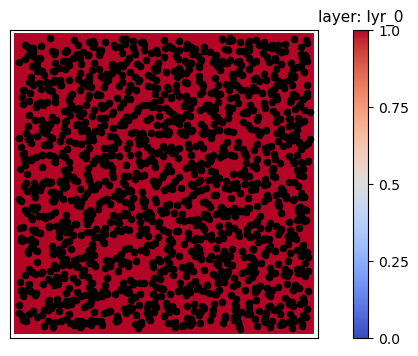

In [90]:
#First we have to run the model burn-in, as always

#SCROLL DOWN TO OBSERVE BURN-IN AND SEE PLOT

mod.walk(T=10000, mode='burn')
#plot the resulting object
mod.plot(spp=0, lyr=0)

In [91]:
#Now we can run the main phase of the model for the first 500 timesteps.
# NOTE: THIS WILL TAKE A FEW MINUTES TO RUN
mod.walk(500, 'main')



main:	it=-1:	t=0
	species: spp_0                         N=1562	(births=301	deaths=303)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=1570	(births=337	deaths=329)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=1565	(births=333	deaths=338)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=1573	(births=306	deaths=298)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=1556	(births=305	deaths=322)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=1588	(births=304	deaths=272)

	........................................................................
main:	it=-1:	t=6
	sp

Then let's plot the individuals in "genetic-relatedness space",
and also map them in geographic space but colored by their genetic relatedness.  Closely related individuals will be similarly colored.

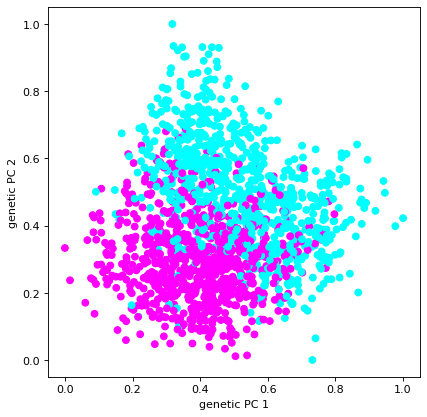

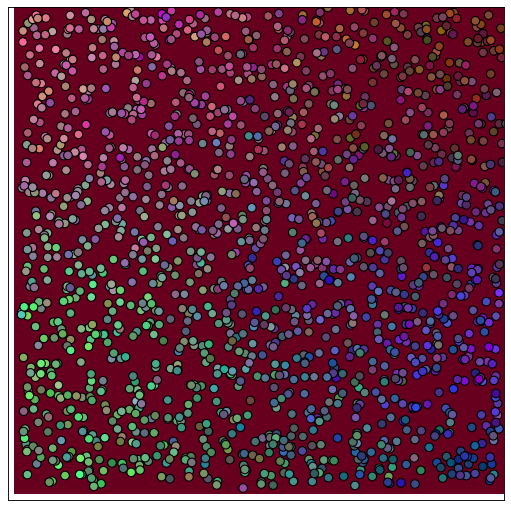

In [98]:
#We'll use the genetic PCA functions we defined at the beginning.
plot_PCA(mod)
map_PCA(mod)

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-warning">
    <b>QUESTION 2: What can you say about gene flow among individuals of this species from the plot of genetic relatedness? Is there any evidence of genetic drift or influence of founder effects happening? (Reminder- this is before the barrier arises)</b>
    <br />    
</div>


Q2: YOUR RESPONSE HERE

<!-- END QUESTION -->

<div class="alert alert-warning" role="alert" style="font-size:120%">
    <b><h2>The effect of the barrier</h2></b> 

Now we will continue running this model. Over the next 50 timesteps, our landscape-change event will occur. The barrier will "arise" on the landscape, and will gradually reduce individuals' ability to move across it.

We will plot our same genetic relatedness plots a few more times, so that we can see if the barrier has any effect on relatedness, and if so, how that effect unfolds over time.

First, we'll run the model 10 more timesteps, the see the landscape right after the barrier has arisen.



	**** Running the next change	(500, <function _get_lyr_change_fn.<locals>.fn at 0x0000017A1D1237E0>)


	**** Running the next change	(500, <function _get_conductance_surface_change_fns.<locals>.fn at 0x0000017A1D123B00>)


main:	it=-1:	t=500
	species: spp_0                         N=1574	(births=309	deaths=308)

	........................................................................
main:	it=-1:	t=501
	species: spp_0                         N=1355	(births=311	deaths=530)

	........................................................................
main:	it=-1:	t=502
	species: spp_0                         N=1368	(births=234	deaths=221)

	........................................................................
main:	it=-1:	t=503
	species: spp_0                         N=1357	(births=261	deaths=272)

	........................................................................
main:	it=-1:	t=504
	species: spp_0                         N=1325	(births=260	deaths=292)

	.......................

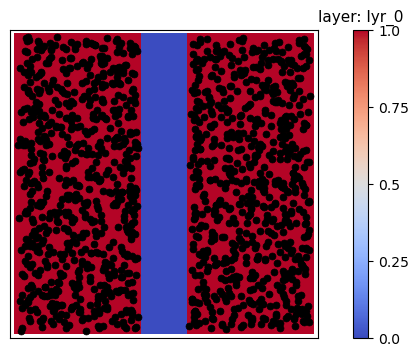

In [104]:
mod.walk(10, 'main')
mod.plot(spp=0, lyr=0)

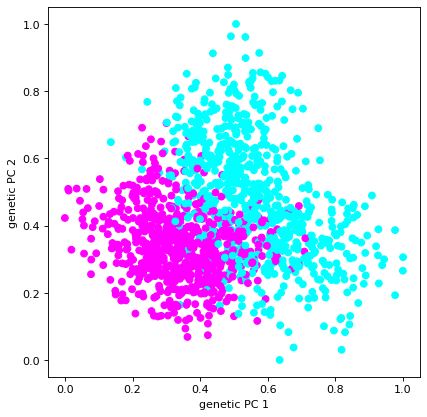

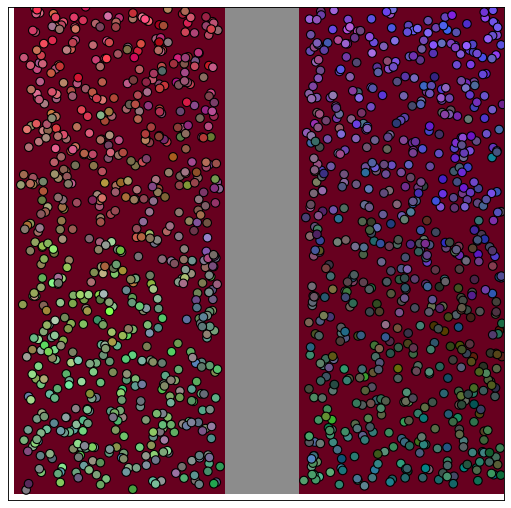

In [105]:
plot_PCA(mod)
map_PCA(mod)

Finally, we'll run the model for another 500 time steps, to give any effects ample time to play out. Then we'll plot genetic relatedness one last time.

Then let's plot genetic relatedness again.

In [110]:
# NOTE: THIS WILL TAKE A FEW MINUTES TO RUN
mod.walk(500, 'main')



main:	it=-1:	t=510
	species: spp_0                         N=1349	(births=256	deaths=255)

	........................................................................
main:	it=-1:	t=511
	species: spp_0                         N=1330	(births=298	deaths=317)

	........................................................................
main:	it=-1:	t=512
	species: spp_0                         N=1338	(births=244	deaths=236)

	........................................................................
main:	it=-1:	t=513
	species: spp_0                         N=1365	(births=286	deaths=259)

	........................................................................
main:	it=-1:	t=514
	species: spp_0                         N=1342	(births=260	deaths=283)

	........................................................................
main:	it=-1:	t=515
	species: spp_0                         N=1337	(births=267	deaths=272)

	........................................................................
main:	it

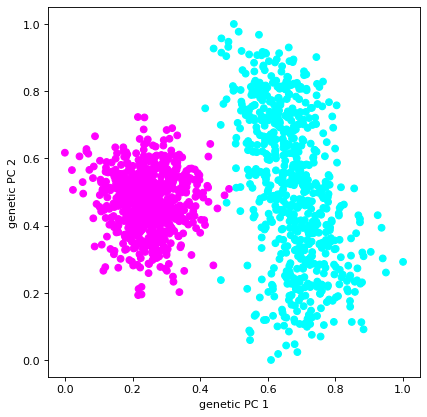

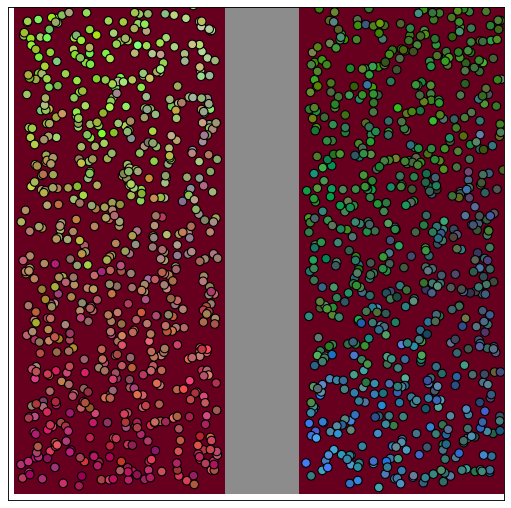

In [111]:
plot_PCA(mod)
map_PCA(mod)

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-warning">
    <b>QUESTION 3: What was the influence of the rise of this barrier (a vicariance event) on gene flow and genetic drift in our population? Be specific.</b>
    <br />    
</div>


Q3: YOUR RESPONSE HERE

<!-- END QUESTION -->

This notebook was developed by Drew Hart, Natalie Graham, Monica Wilkinson and Keeley Takimoto (2019) and contributed to by Anusha Bishop (2020)